# Lab | Cleaning categorical data

### Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
numericals = customer_df.select_dtypes(np.number)
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

continuous, discrete = to_dict(numericals)
discrete_df = pd.DataFrame.from_dict(discrete)
discrete_df.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [4]:
continuous_df= pd.DataFrame.from_dict(continuous)
continuous_df.head()

,Customer Lifetime Value,Total Claim Amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


In [5]:
num = customer_df.select_dtypes(include = np.number)

In [6]:
num = num.drop(['Total Claim Amount'], axis =1)

In [7]:
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


### Plot a correlation matrix, what can you see?

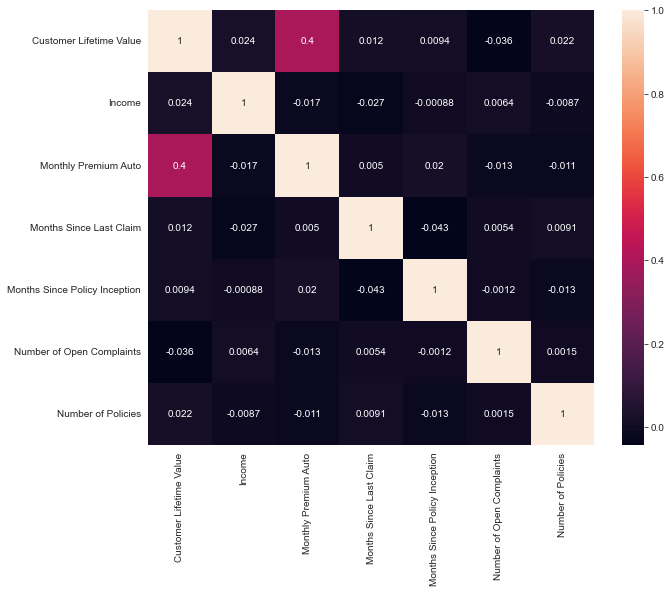

In [8]:

corr_matrix=num.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

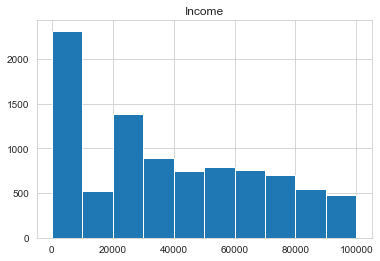

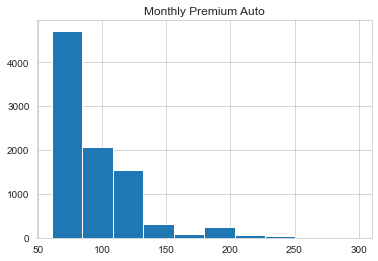

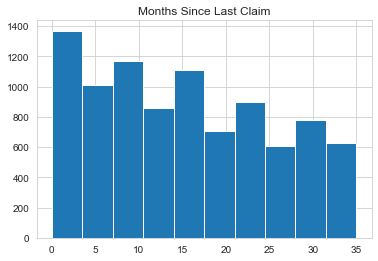

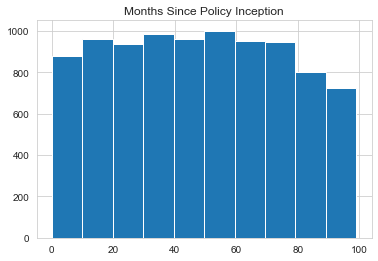

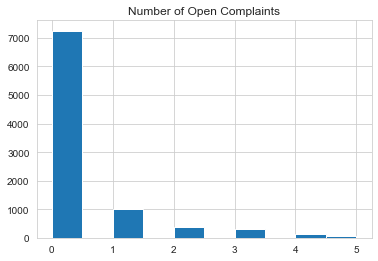

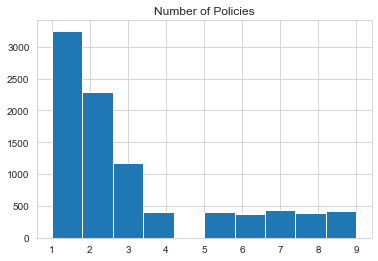

In [9]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

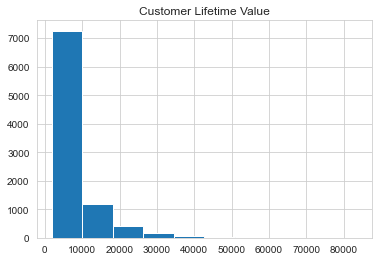

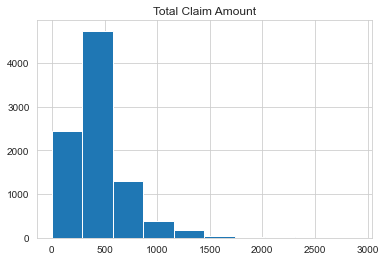

In [10]:
for column in continuous_df:
    continuous_df[column].hist()
    plt.title(column)
    plt.show()

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

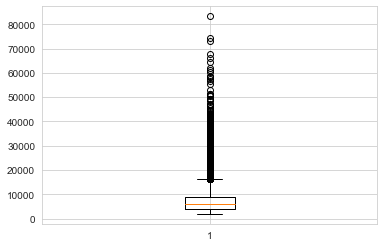

<Figure size 7200x50400 with 0 Axes>

In [11]:
plt.boxplot(continuous_df['Customer Lifetime Value'])
fig = plt.figure(figsize =(100, 700))
plt.show()

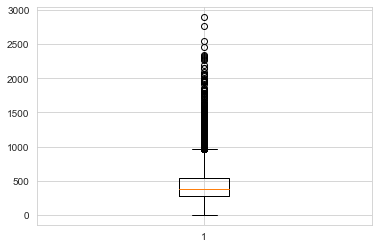

<Figure size 720x504 with 0 Axes>

In [12]:
plt.boxplot(continuous_df['Total Claim Amount'])
fig = plt.figure(figsize =(10, 7))
plt.show()

### Check nan values per column.

In [13]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### there are no nan values

### Get categorical features.

In [14]:
cat = customer_df.select_dtypes(include = np.object)

In [15]:
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### What should we do with the customer_id column?

#### We can drop it becasue it cant be treated as numerical or categorical. It can not be encoded as a categorical variable becasue it has too many unique values.

In [16]:
customer_df = customer_df.drop(['Customer'], axis =1)
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot. What can you see?

In [17]:
cat = customer_df.select_dtypes(include = np.object)

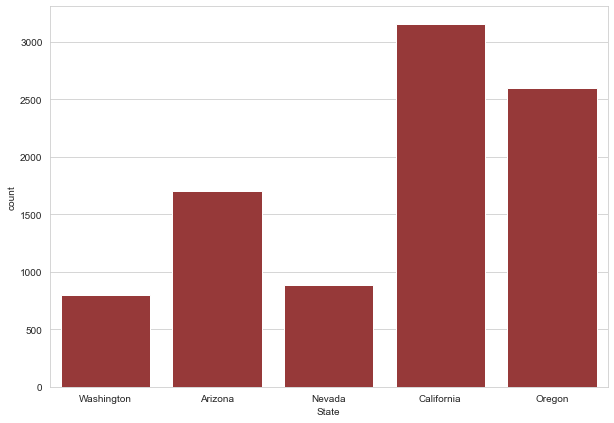

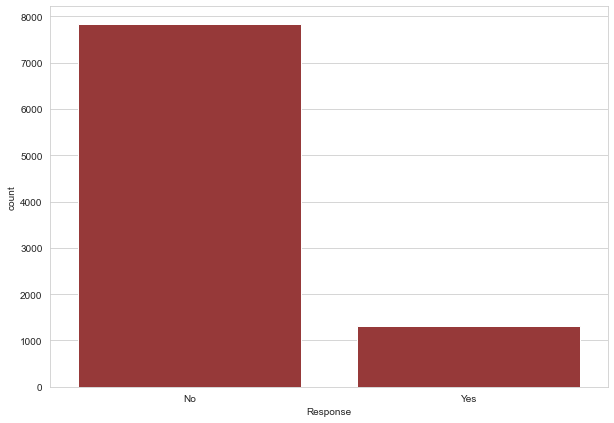

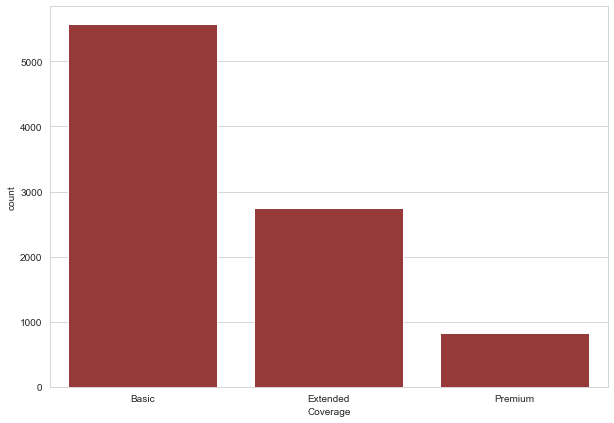

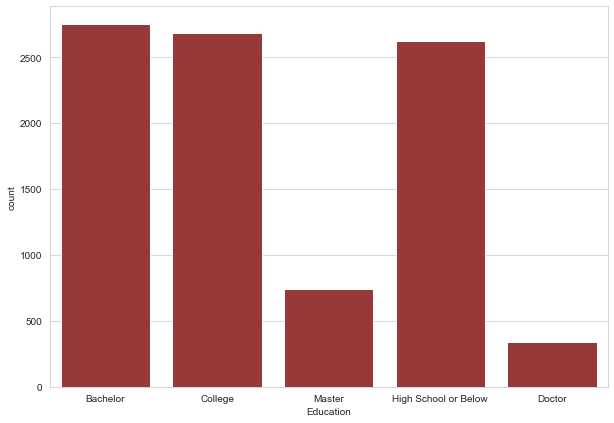

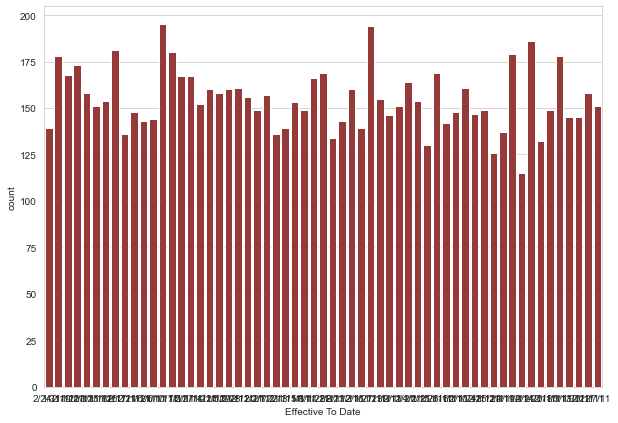

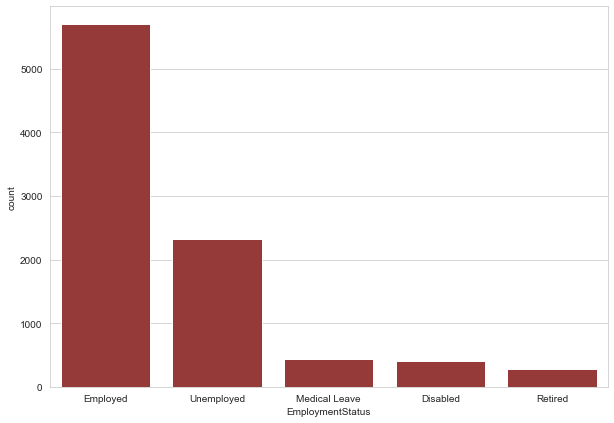

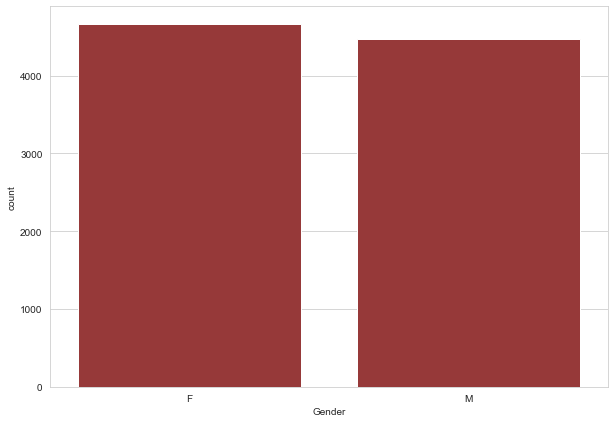

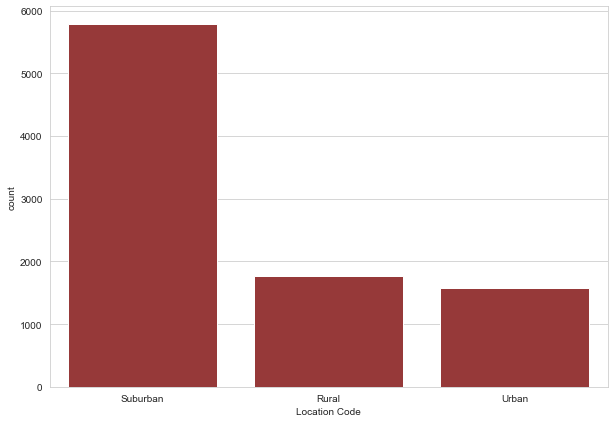

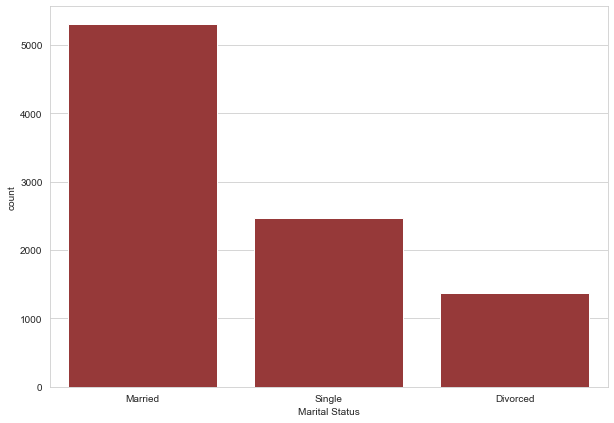

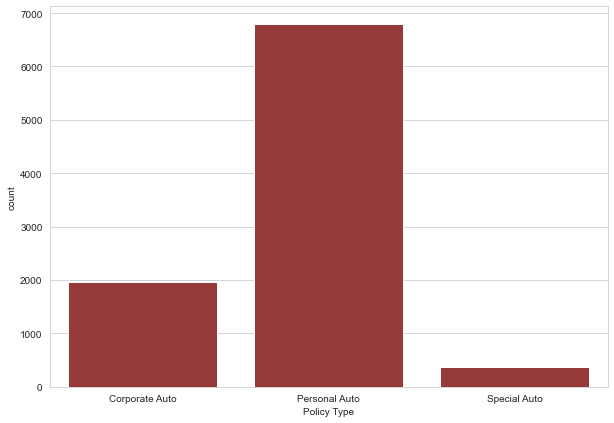

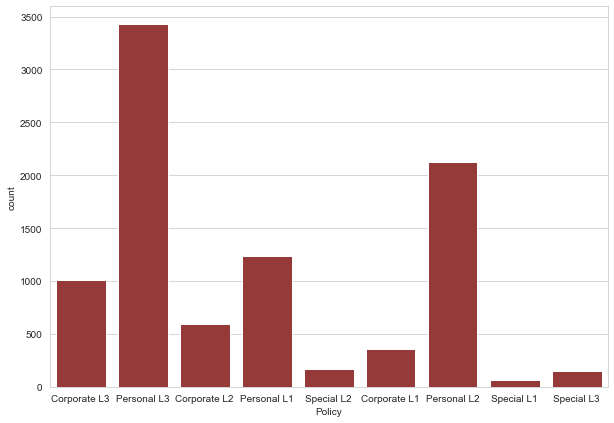

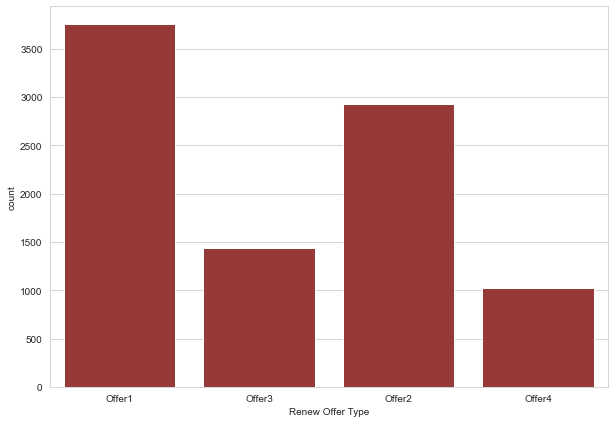

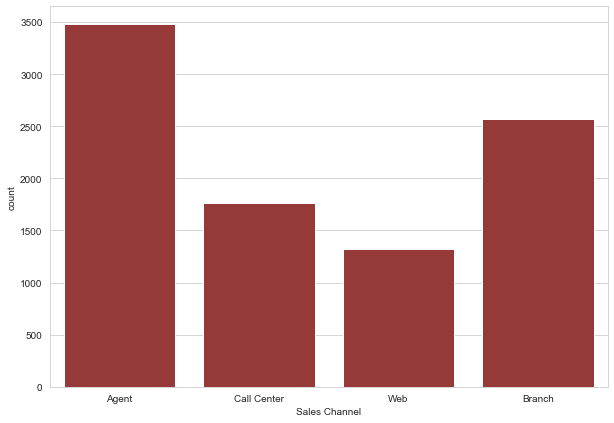

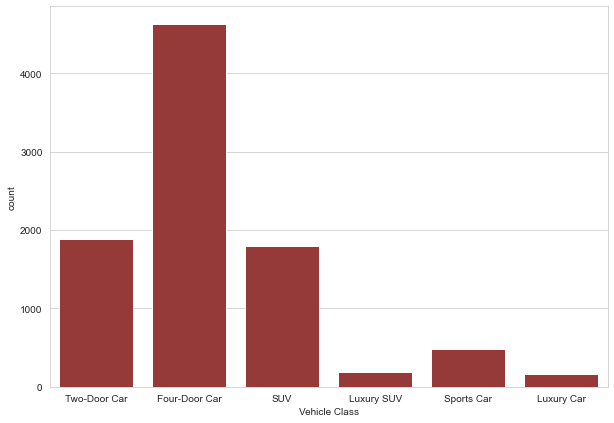

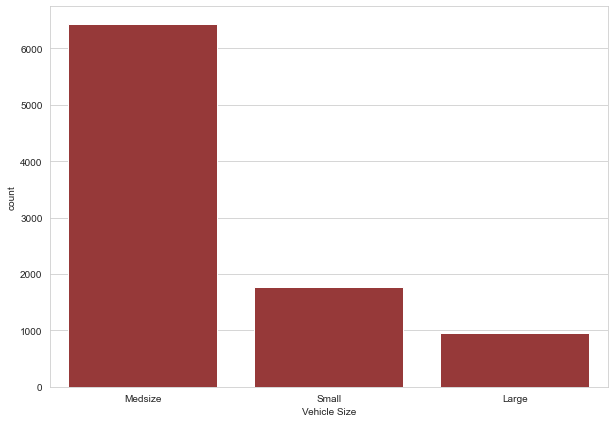

In [18]:
for col in cat.columns:
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.countplot(col, data=cat, color='brown')
    plt.show()

In [19]:
# Effective to date plot is weird becasue its a date column. 

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [20]:
### we can drop the redundant columns

In [21]:
cat = cat.drop(['Gender','Policy Type', 'Effective To Date'], axis=1)
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Plot time variable. Can you extract something from it?

In [22]:
# first chnage the format
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [23]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<AxesSubplot:xlabel='Effective To Date', ylabel='Total Claim Amount'>

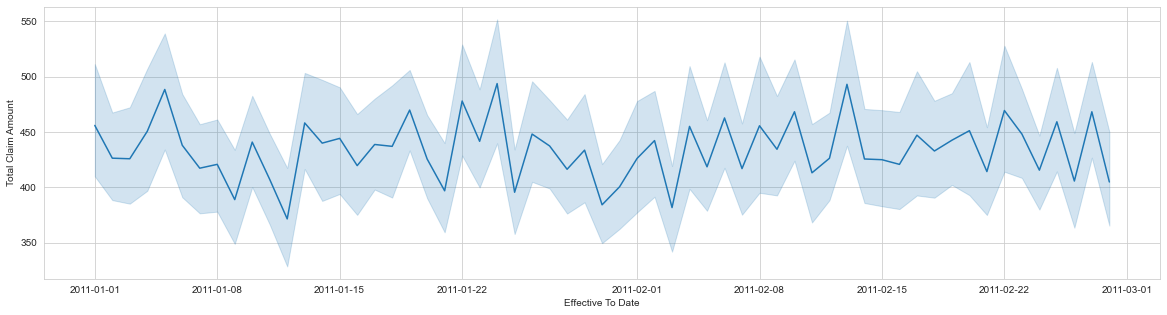

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(customer_df['Effective To Date'], customer_df['Total Claim Amount'] )

# Lab | Comparing regression models

In [25]:

cat_encoded = pd.get_dummies(cat, drop_first=True)

cat_encoded.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
transformer = StandardScaler().fit(num)
num_standardized = transformer.transform(num)
num_standardized = pd.DataFrame(num_standardized,columns=num.columns.tolist())
num_standardized.head()
num = num_standardized
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


In [27]:
target = customer_df['Total Claim Amount']
target = pd.DataFrame(target)
target.head()

,Total Claim Amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [28]:
together = pd.concat([cat_encoded, num, target], axis=1)
together.head()


,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,384.811147
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,1131.464935
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,566.472247
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,529.881344
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,138.130879


### In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [29]:
y = together['Total Claim Amount']
X = together.drop('Total Claim Amount', axis =1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [30]:
X.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


### Try a simple linear regression with all the data to see whether we are getting good results.

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)
lm_predictions = lm_model.predict(X_test)
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))


The mean absolute error of the model in the test set is:  94.36
The mean squared error of the model in the test set is: 17852.01
The root mean squared error of the model in the test set is: 133.61
The R2 of the model in the test set is: 0.78


### Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
def models(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    lm = linear_model.LinearRegression()
    lm_model = lm.fit(X_train,y_train)
    lm_predictions = lm_model.predict(X_test)
    MAE = mean_absolute_error(y_test,lm_predictions)
    MSE = mean_squared_error(y_test,lm_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,lm_predictions)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    sns.scatterplot(x = lm_predictions, y = y_test )
    plt.figure()


    
    knn1_model = KNeighborsRegressor(n_neighbors=3) # The keyword "n_neighbors" is what sets the K.
    knn1_model.fit(X_train, y_train)
    knn1_predictions = knn1_model.predict(X_test) 
    MAEk1 = mean_absolute_error(y_test, knn1_predictions)
    MSEk1 = mean_squared_error(y_test, knn1_predictions)
    RMSEk1 = np.sqrt(MSEk1)
    R2k1 = r2_score(y_test, knn1_predictions)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAEk1))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSEk1))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSEk1))
    print("The R2 of the model in the test set is: %4.2f" % (R2k1))
    sns.scatterplot(y = knn1_predictions, x = y_test)
    plt.figure()


    
    
    knn2_model = KNeighborsRegressor(n_neighbors=5) # The keyword "n_neighbors" is what sets the K.
    knn2_model.fit(X_train, y_train)
    knn2_predictions = knn2_model.predict(X_test) 
    MAEk2 = mean_absolute_error(y_test, knn2_predictions)
    MSEk2 = mean_squared_error(y_test, knn2_predictions)
    RMSEk2 = np.sqrt(MSEk2)
    R2k2 = r2_score(y_test, knn2_predictions)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAEk2))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSEk2))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSEk2))
    print("The R2 of the model in the test set is: %4.2f" % (R2k2))
    sns.scatterplot(y = knn2_predictions, x = y_test)
    plt.figure()

    

    
    return 
    
   
        

### Use the function to check LinearRegressor and KNeighborsRegressor.

The mean absolute error of the model in the test set is:  94.36
The mean squared error of the model in the test set is: 17852.01
The root mean squared error of the model in the test set is: 133.61
The R2 of the model in the test set is: 0.78
The mean absolute error of the model in the test set is: 117.76
The mean squared error of the model in the test set is: 31544.32
The root mean squared error of the model in the test set is: 177.61
The R2 of the model in the test set is: 0.60
The mean absolute error of the model in the test set is: 114.17
The mean squared error of the model in the test set is: 28058.54
The root mean squared error of the model in the test set is: 167.51
The R2 of the model in the test set is: 0.65


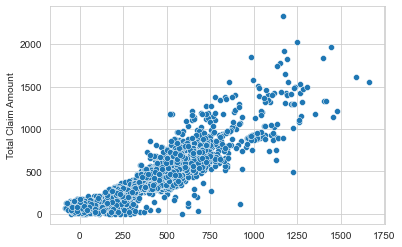

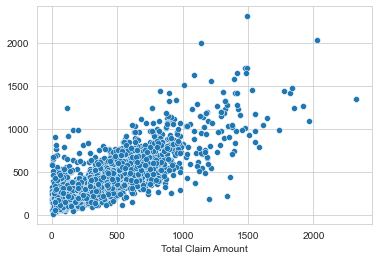

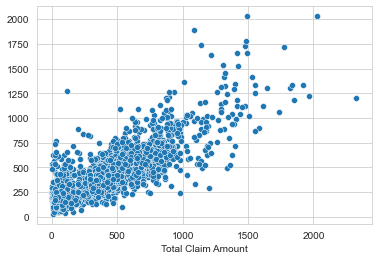

<Figure size 432x288 with 0 Axes>

In [34]:
models(X,y)

### You can check also the MLPRegressor for this task!


In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test)

regr.score(X_test, y_test)

0.8416538896643924

# Lab | Random variable distributions

### Get the numerical variables from our dataset.


In [36]:
number = customer_df.select_dtypes(include = np.number)
number.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

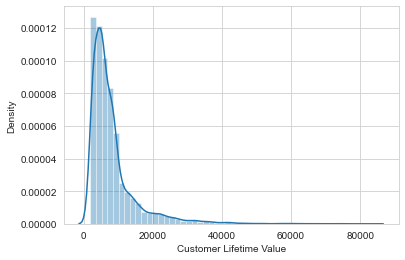

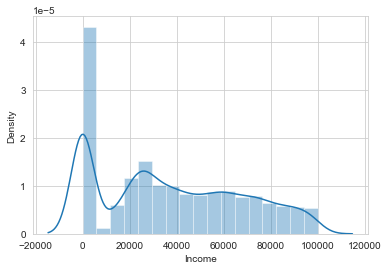

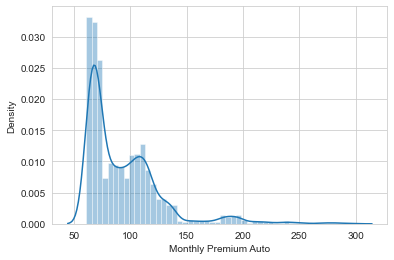

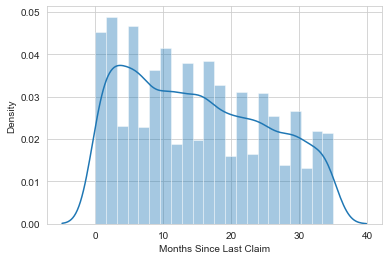

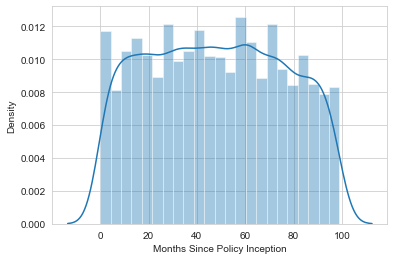

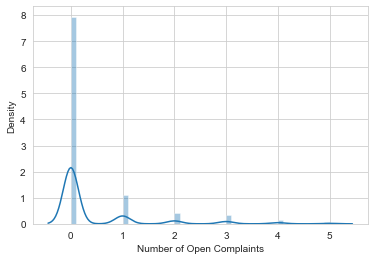

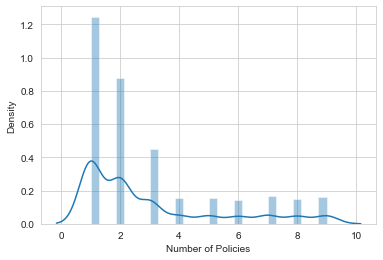

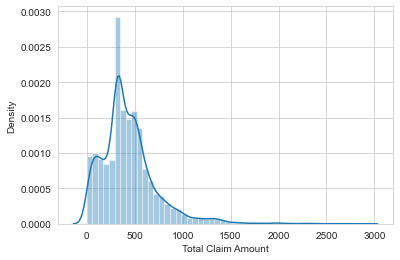

In [37]:
# create distplots
for column in number.columns:
    plt.figure()             # <==================== here!
    sns.distplot(number[column])


In [38]:

def filter_1(df):
    for column in df:
        Q1 = number[column].quantile(0.25)
        Q3 = number[column].quantile(0.75)
        IQR = Q3-Q1
        
        filter = (number[column] >= Q1 - 1.5 * IQR) & (number[column] <= Q3 + 1.5 * IQR)
        return number.loc[filter]


In [39]:
filter_1(number)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [40]:
number_after = filter_1(number) # we remove the outliers

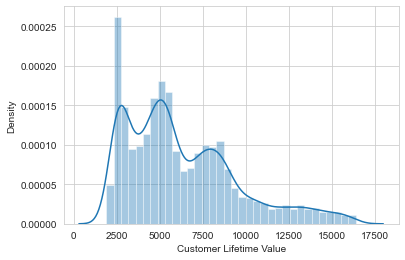

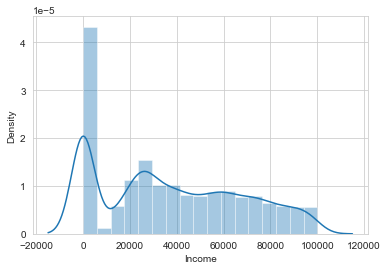

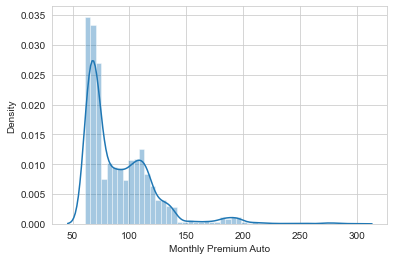

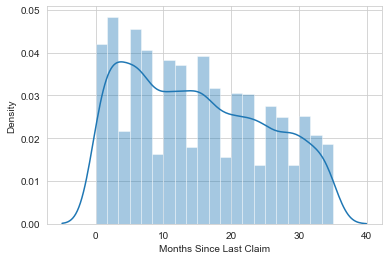

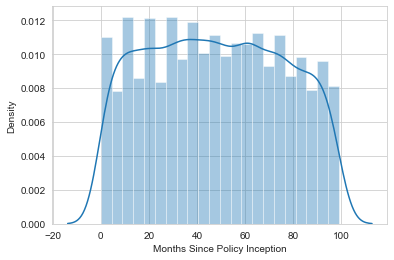

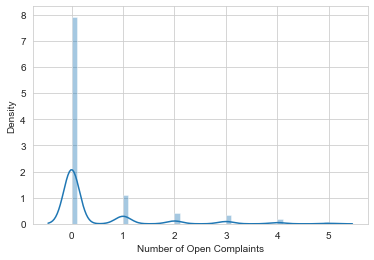

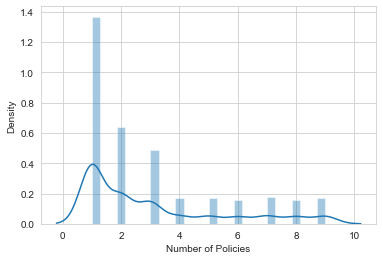

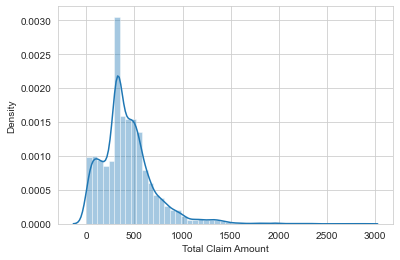

In [41]:
for column in number_after.columns:
    plt.figure()             
    sns.distplot(number_after[column])


### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [42]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


#### I havent figured out yet how to apply this function. The plan was to apply it and then plot the distribution and see the difference.  